<a href="https://colab.research.google.com/github/adnaen/machine-learning-notes/blob/main/deep_learning/4_nlp/terminologies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Terminologies in NLP**

In [1]:
import re
import nltk

test_text: str = "I'm Walking through a lake, but i did'nt like it!"
test_text = test_text.lower()

In [2]:
! pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.6 MB/s eta 0:00:00


In [3]:
# pre-trained model for nlp tasks
nltk.download('punkt_ta')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('words')

[nltk_data] Error loading punkt_ta: Package 'punkt_ta' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## **Tokenization**: splitting text into words.(unlike split word with spaces, it split spaces and special char)

In [4]:
re.split("\s", test_text)

["i'm",
 'walking',
 'through',
 'a',
 'lake,',
 'but',
 'i',
 "did'nt",
 'like',
 'it!']

In [5]:
# with nltk
words = nltk.word_tokenize(test_text)
words

['i',
 "'m",
 'walking',
 'through',
 'a',
 'lake',
 ',',
 'but',
 'i',
 "did'nt",
 'like',
 'it',
 '!']

## **Stemming** : reducing word to their root form (mostly it just cutout the postfix words such as 'ing' 'ed' 's' from the word)

In [6]:
# e.g.
# running -> runn
# Natural -> Natur

In [7]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
" ".join([ps.stem(each) for each in words])  # stemmed text

"i 'm walk through a lake , but i did'nt like it !"

## **Part Of Speech (POS)**: identify and classify word as noun, verbe .. and so on

In [8]:
from nltk.tag import pos_tag

word_pos = pos_tag(words)
word_pos

[('i', 'NN'),
 ("'m", 'VBP'),
 ('walking', 'VBG'),
 ('through', 'IN'),
 ('a', 'DT'),
 ('lake', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('i', 'JJ'),
 ("did'nt", 'VBP'),
 ('like', 'IN'),
 ('it', 'PRP'),
 ('!', '.')]

## **Lemmatization**: covert word into their meaningfull form (it give more meaningfull and dictionary based word)

- **Before apply lemmatization its better perform pos_tag first, bcz the lemmatization need post tag of word to perform well.**
- **only need to lemmatize 'NOUN', 'VERB', 'ADVERB', 'ADJECTIVE'**

In [9]:
# e.g.
# better -> good

In [10]:
from nltk.corpus import wordnet

pos_result = []
for each in word_pos:
    pt = each[1][0]
    match pt:
        case "V":
            pos_result.append((each[0], wordnet.VERB))
        case "N":
            pos_result.append((each[0], wordnet.NOUN))
        case "J":
            pos_result.append((each[0], wordnet.ADJ))
        case _:
            pos_result.append((each[0],))


pos_result

[('i', 'n'),
 ("'m", 'v'),
 ('walking', 'v'),
 ('through',),
 ('a',),
 ('lake', 'n'),
 (',',),
 ('but',),
 ('i', 'a'),
 ("did'nt", 'v'),
 ('like',),
 ('it',),
 ('!',)]

In [11]:
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()
" ".join([wl.lemmatize(each[0], pos=each[1] if len(each) >= 2 else "n") for each in pos_result])

"i 'm walk through a lake , but i did'nt like it !"

## **Named Entity Recognition (NER)** : add lables on word, such as names, date .. so on

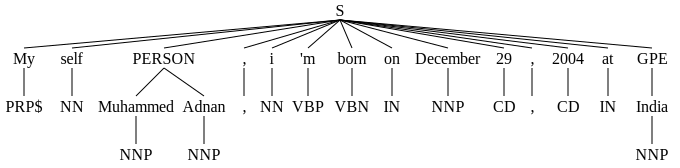

In [12]:
from nltk import ne_chunk

text = "My self Muhammed Adnan, i'm born on December 29, 2004 at India"
token = nltk.word_tokenize(text)
my_pos = pos_tag(token)
tree = ne_chunk(my_pos)
tree

In [13]:
for each in tree:
    if hasattr(each, "label"):
        value = " ".join([ word for word, cat in each.leaves()])
        label = each.label()
        print((value, label))

('Muhammed Adnan', 'PERSON')
('India', 'GPE')


## **Bag Of Words (BOW)**:
- First, it identify all the unique words in the dataset
- Then, it make count on each word how much time that word occure in the sentence
- Then, it genreate a matrix with that values
- Voccbulary (unique values)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

texts = [
    "Hey John, could you please clarify me to our new Data Science Project!",
    "Sure MCcathy, here the main thing that we need to implement."
]

cv = CountVectorizer(stop_words="english")
text_vector = cv.fit_transform(texts)

print(f"Voccabulary (unique values in the 'texts' dataset): \n{cv.get_feature_names_out()}")

print(f"array : \n{text_vector.toarray()}")

Voccabulary (unique values in the 'texts' dataset): 
['clarify' 'data' 'hey' 'implement' 'john' 'main' 'mccathy' 'need' 'new'
 'project' 'science' 'sure' 'thing']
array : 
[[1 1 1 0 1 0 0 0 1 1 1 0 0]
 [0 0 0 1 0 1 1 1 0 0 0 1 1]]


- **voccabulary count: `23`**
- **It convert all sentence to each vector (size: voccabulary size)**
- **Count each word if the word in voccabulary, else it mark as 0**

## **TF-IDF (Term Frequency & Inverse Document Frequency)**

- **It reduce the importence of the word which is most occured in entire docuement. And give weight to words that are less occured in less**
- **`Term Frequency`** : Measure the frequency of word in one docuement.
- **`Inverse Docuement Frequency`** : Measure the rareness of a word in entire docuement, and it give importence if the word has high rareness and vise verse

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(stop_words="english")
tf_idf_model = tf_idf.fit_transform(texts)

In [29]:
tf_idf.get_feature_names_out()
tf_idf_model.toarray()

array([[0.37796447, 0.37796447, 0.37796447, 0.        , 0.37796447,
        0.        , 0.        , 0.        , 0.37796447, 0.37796447,
        0.37796447, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.40824829, 0.        ,
        0.40824829, 0.40824829, 0.40824829, 0.        , 0.        ,
        0.        , 0.40824829, 0.40824829]])